# Preprocessing for Experimental Samples
## Import components:SciPy input/output, Numpy, Time, MATLAB 7.3, OpenCV, and Visualization with Python.

In [1]:
import scipy.io as sio
import numpy as np
import time
import mat73
import cv2
import matplotlib.pyplot as plt

## Load Experimental Sample ABO524691284, and set hyper-parameters for bilateral and Gaussian filtering.

In [2]:
start_time = time.time()

Video = mat73.loadmat('./Experimental_Sample/524691284_depth275_frame18501-23500.mat')
Mask = sio.loadmat('./Experimental_Sample/524691284_depth275_ROI_frame18501-23500.mat')
Video = np.float32(Video['sample'])
Mask = Mask['seg']
Denoise = np.zeros_like(Video)
Neuropil_removed = np.zeros_like(Video)
for i in range(Video.shape[2]):
    Neuropil_removed[:,:,i] = Video[:,:,i] - cv2.GaussianBlur(Video[:,:,i],(51,51),sigmaX=20)
    Denoise[:,:,i] = cv2.bilateralFilter(Neuropil_removed[:,:,i],d=5,sigmaColor=50,sigmaSpace=50)

print("--- %s seconds escaped ---" % (time.time() - start_time))

--- 49.007447719573975 seconds escaped ---


## Visualize the ROIs with its raw and preprocessed traces of 4 randomly chosen neurons.

(-249.95000000000002, 5248.95, 0.00014805904785056149, 0.05931230354180307)

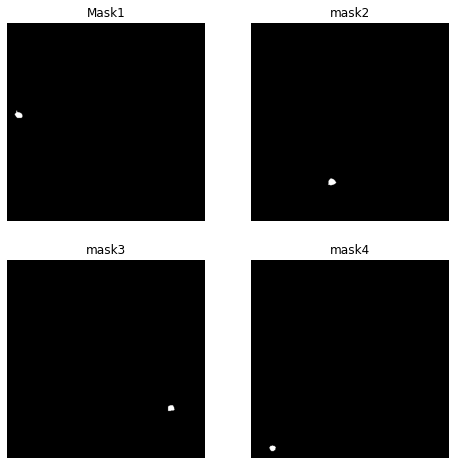

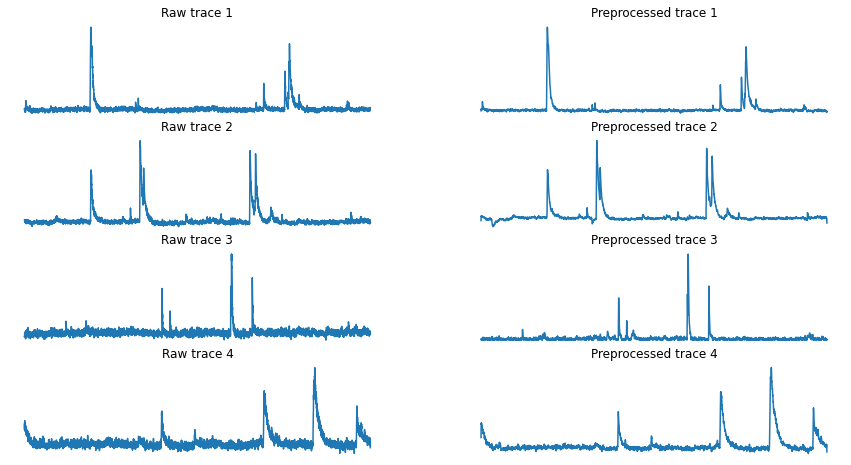

In [8]:
mask1 = Mask[:,:,2]
mask2 = Mask[:,:,52]
mask3 = Mask[:,:,83]
mask4 = Mask[:,:,139]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(mask1,vmin=0,vmax=1,cmap='gray')
plt.axis('off')  
plt.title('Mask1')
plt.subplot(2,2,2)
plt.imshow(mask2,vmin=0,vmax=1,cmap='gray')
plt.axis('off')  
plt.title('mask2')
plt.subplot(2,2,3)
plt.imshow(mask3,vmin=0,vmax=1,cmap='gray')
plt.axis('off')  
plt.title('mask3')
plt.subplot(2,2,4)
plt.imshow(mask4,vmin=0,vmax=1,cmap='gray')
plt.axis('off')  
plt.title('mask4')
trace1_raw = np.zeros((Video.shape[2],))
trace1_prepro = np.zeros((Video.shape[2],))
trace2_raw = np.zeros((Video.shape[2],))
trace2_prepro = np.zeros((Video.shape[2],))
trace3_raw = np.zeros((Video.shape[2],))
trace3_prepro = np.zeros((Video.shape[2],))
trace4_raw = np.zeros((Video.shape[2],))
trace4_prepro = np.zeros((Video.shape[2],))
for i in range(Video.shape[2]):
    trace1_prepro[i] = np.sum(np.sum(Denoise[:,:,i][mask1==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask1)
    trace1_raw[i] = np.sum(np.sum(Video[:,:,i][mask1==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask1)
    trace2_prepro[i] = np.sum(np.sum(Denoise[:,:,i][mask2==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask2)
    trace2_raw[i] = np.sum(np.sum(Video[:,:,i][mask2==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask2)
    trace3_prepro[i] = np.sum(np.sum(Denoise[:,:,i][mask3==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask3)
    trace3_raw[i] = np.sum(np.sum(Video[:,:,i][mask3==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask3)
    trace4_prepro[i] = np.sum(np.sum(Denoise[:,:,i][mask4==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask4)
    trace4_raw[i] = np.sum(np.sum(Video[:,:,i][mask4==1],axis=0,keepdims=False),axis=0,keepdims=False)/np.count_nonzero(mask4)

plt.figure(figsize=(15, 8))
plt.subplot(4,2,1)
plt.title('Raw trace 1')
plt.plot(trace1_raw)
plt.axis('off')                
plt.subplot(4,2,2)
plt.title('Preprocessed trace 1')
plt.plot(trace1_prepro)
plt.axis('off')
plt.subplot(4,2,3)
plt.title('Raw trace 2')
plt.plot(trace2_raw)
plt.axis('off')                
plt.subplot(4,2,4)
plt.title('Preprocessed trace 2')
plt.plot(trace2_prepro)
plt.axis('off')
plt.subplot(4,2,5)
plt.title('Raw trace 3')
plt.plot(trace3_raw)
plt.axis('off')                
plt.subplot(4,2,6)
plt.title('Preprocessed trace 3')
plt.plot(trace3_prepro)
plt.axis('off')
plt.subplot(4,2,7)
plt.title('Raw trace 4')
plt.plot(trace4_raw)
plt.axis('off')                
plt.subplot(4,2,8)
plt.title('Preprocessed trace 4')
plt.plot(trace4_prepro)
plt.axis('off')
